In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import sys
sys.path.insert(0, '/content/gdrive/MyDrive/Colab Notebooks')

In [ ]:
import pytorch_optimizer as optim

In [ ]:
import torch
import random
import numpy as np
import pandas as pd

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
from tqdm import tqdm
import pandas as pd

In [ ]:
CIFAR_train = torchvision.datasets.CIFAR100('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR100('./', download=True, train=False)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./cifar-100-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [ ]:
len(y_train), len(y_test)

(50000, 10000)

In [ ]:
X_train.min(), X_train.max()

(tensor(0.), tensor(255.))

In [ ]:
X_train /= 255.
X_test /= 255.

In [ ]:
CIFAR_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

tensor(19) tensor(29) tensor(0) tensor(11) tensor(1) tensor(86) tensor(90) tensor(28) tensor(23) tensor(31) 

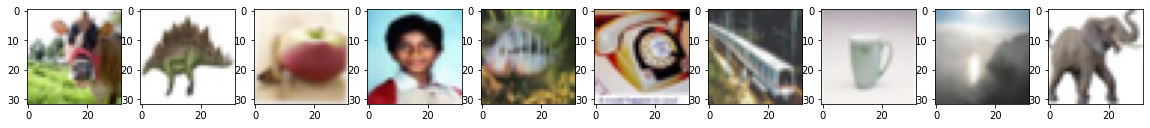

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [ ]:
X_train.shape, y_train.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([50000]))

In [ ]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [ ]:
X_train.shape

torch.Size([50000, 3, 32, 32])

In [ ]:
def train(net, X_train, y_train, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(net.parameters(), lr=5.0e-2)
    #optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)
    #optimizer = optim.PNMBelief(net.parameters(), lr=0.001)
    #optimizer = optim.YogiPNM(net.parameters())
    optimizer = optim.AdaBelief(net.parameters())
    #optimizer = optim.DiffGrad(net.parameters())
    #optimizer = optim.Yogi(net.parameters())
    
    batch_size = 200

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(20):
        print("epoch ", epoch)
        order = np.random.permutation(len(X_train))
        
        if epoch == 12:
            optimizer = torch.optim.Adam(net.parameters(), lr=0.5e-4)

        for start_index in tqdm(range(0, len(X_train), batch_size)):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()
            
            X_batch

        net.eval()
        with torch.no_grad():
            test_preds = net.forward(X_test)
            loss_value = loss(test_preds, y_test).item()
            test_loss_history.append(loss_value)

            accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().item()
            test_accuracy_history.append(accuracy)
            #print(test_preds.argmax(dim=1))
            #print(y_test)

        print("accuracy = ", accuracy)
        print("\n\n")

    return test_accuracy_history, test_loss_history

In [ ]:
accuracies = {}
losses = {}

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
accuracies['resnet50+Yogi'], losses['resnet50+Yogi'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:24<00:00, 10.24it/s]


accuracy =  0.1873999983072281



epoch  1


100%|██████████| 250/250 [00:24<00:00, 10.15it/s]


accuracy =  0.5200999975204468



epoch  2


100%|██████████| 250/250 [00:24<00:00, 10.08it/s]


accuracy =  0.5773000121116638



epoch  3


100%|██████████| 250/250 [00:25<00:00,  9.97it/s]


accuracy =  0.5931000113487244



epoch  4


100%|██████████| 250/250 [00:25<00:00,  9.89it/s]


accuracy =  0.5945999622344971



epoch  5


100%|██████████| 250/250 [00:25<00:00,  9.81it/s]


accuracy =  0.5988999605178833



epoch  6


100%|██████████| 250/250 [00:25<00:00,  9.76it/s]


accuracy =  0.5979999899864197



epoch  7


100%|██████████| 250/250 [00:25<00:00,  9.80it/s]


accuracy =  0.607699990272522



epoch  8


100%|██████████| 250/250 [00:25<00:00,  9.79it/s]


accuracy =  0.6071999669075012



epoch  9


100%|██████████| 250/250 [00:25<00:00,  9.78it/s]


accuracy =  0.6161999702453613



epoch  10


100%|██████████| 250/250 [00:25<00:00,  9.78it/s]


accuracy =  0.6175000071525574



epoch  11


100%|██████████| 250/250 [00:25<00:00,  9.80it/s]


accuracy =  0.6121999621391296



epoch  12


100%|██████████| 250/250 [00:25<00:00,  9.98it/s]


accuracy =  0.6401000022888184



epoch  13


100%|██████████| 250/250 [00:25<00:00,  9.98it/s]


accuracy =  0.6471999883651733



epoch  14


100%|██████████| 250/250 [00:25<00:00,  9.99it/s]


accuracy =  0.6462000012397766



epoch  15


100%|██████████| 250/250 [00:25<00:00,  9.97it/s]


accuracy =  0.6453999876976013



epoch  16


100%|██████████| 250/250 [00:25<00:00,  9.99it/s]


accuracy =  0.6474999785423279



epoch  17


100%|██████████| 250/250 [00:25<00:00, 10.00it/s]


accuracy =  0.6446999907493591



epoch  18


100%|██████████| 250/250 [00:25<00:00,  9.98it/s]


accuracy =  0.6487999558448792



epoch  19


100%|██████████| 250/250 [00:25<00:00,  9.97it/s]


accuracy =  0.6505999565124512





In [ ]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
accuracies['resnet50+DiffGrad'], losses['resnet50+DiffGrad'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:28<00:00,  8.92it/s]


accuracy =  0.46299999952316284



epoch  1


100%|██████████| 250/250 [00:27<00:00,  8.97it/s]


accuracy =  0.5726999640464783



epoch  2


100%|██████████| 250/250 [00:28<00:00,  8.85it/s]


accuracy =  0.6035000085830688



epoch  3


100%|██████████| 250/250 [00:28<00:00,  8.86it/s]


accuracy =  0.6062999963760376



epoch  4


100%|██████████| 250/250 [00:28<00:00,  8.85it/s]


accuracy =  0.6119999885559082



epoch  5


100%|██████████| 250/250 [00:28<00:00,  8.85it/s]


accuracy =  0.6161999702453613



epoch  6


100%|██████████| 250/250 [00:28<00:00,  8.87it/s]


accuracy =  0.6050999760627747



epoch  7


100%|██████████| 250/250 [00:28<00:00,  8.88it/s]


accuracy =  0.6071000099182129



epoch  8


100%|██████████| 250/250 [00:28<00:00,  8.86it/s]


accuracy =  0.6136999726295471



epoch  9


100%|██████████| 250/250 [00:28<00:00,  8.86it/s]


accuracy =  0.6108999848365784



epoch  10


100%|██████████| 250/250 [00:28<00:00,  8.81it/s]


accuracy =  0.6132000088691711



epoch  11


100%|██████████| 250/250 [00:28<00:00,  8.88it/s]


accuracy =  0.6166999936103821



epoch  12


100%|██████████| 250/250 [00:25<00:00,  9.97it/s]


accuracy =  0.6467999815940857



epoch  13


100%|██████████| 250/250 [00:25<00:00,  9.96it/s]


accuracy =  0.6516000032424927



epoch  14


100%|██████████| 250/250 [00:25<00:00,  9.97it/s]


accuracy =  0.6547999978065491



epoch  15


100%|██████████| 250/250 [00:25<00:00,  9.97it/s]


accuracy =  0.6539999842643738



epoch  16


100%|██████████| 250/250 [00:25<00:00,  9.98it/s]


accuracy =  0.654699981212616



epoch  17


100%|██████████| 250/250 [00:24<00:00, 10.01it/s]


accuracy =  0.6581000089645386



epoch  18


100%|██████████| 250/250 [00:25<00:00,  9.99it/s]


accuracy =  0.6588000059127808



epoch  19


100%|██████████| 250/250 [00:25<00:00,  9.96it/s]


accuracy =  0.6592999696731567





In [ ]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
accuracies['resnet50+AdaBelief'], losses['resnet50+AdaBelief'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:25<00:00,  9.80it/s]


accuracy =  0.28329998254776



epoch  1


100%|██████████| 250/250 [00:26<00:00,  9.57it/s]


accuracy =  0.542199969291687



epoch  2


100%|██████████| 250/250 [00:26<00:00,  9.56it/s]


accuracy =  0.57669997215271



epoch  3


100%|██████████| 250/250 [00:25<00:00,  9.67it/s]


accuracy =  0.5853999853134155



epoch  4


100%|██████████| 250/250 [00:26<00:00,  9.51it/s]


accuracy =  0.5959999561309814



epoch  5


100%|██████████| 250/250 [00:28<00:00,  8.71it/s]


accuracy =  0.5911999940872192



epoch  6


100%|██████████| 250/250 [00:26<00:00,  9.46it/s]


accuracy =  0.6007999777793884



epoch  7


100%|██████████| 250/250 [00:26<00:00,  9.49it/s]


accuracy =  0.6019999980926514



epoch  8


100%|██████████| 250/250 [00:26<00:00,  9.46it/s]


accuracy =  0.599299967288971



epoch  9


100%|██████████| 250/250 [00:26<00:00,  9.46it/s]


accuracy =  0.5978999733924866



epoch  10


100%|██████████| 250/250 [00:26<00:00,  9.47it/s]


accuracy =  0.5929999947547913



epoch  11


100%|██████████| 250/250 [00:26<00:00,  9.47it/s]


accuracy =  0.5572999715805054



epoch  12


100%|██████████| 250/250 [00:25<00:00, 10.00it/s]


accuracy =  0.6284999847412109



epoch  13


100%|██████████| 250/250 [00:24<00:00, 10.00it/s]


accuracy =  0.6378999948501587



epoch  14


100%|██████████| 250/250 [00:25<00:00,  9.98it/s]


accuracy =  0.6416000127792358



epoch  15


100%|██████████| 250/250 [00:24<00:00, 10.00it/s]


accuracy =  0.6407999992370605



epoch  16


100%|██████████| 250/250 [00:25<00:00,  9.97it/s]


accuracy =  0.6437000036239624



epoch  17


  9%|▉         | 22/250 [00:02<00:22,  9.99it/s]


KeyboardInterrupt: ignored

In [ ]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
accuracies['resnet50+YogiPNM'], losses['resnet50+YogiPNM'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:28<00:00,  8.90it/s]


accuracy =  0.46859997510910034



epoch  1


100%|██████████| 250/250 [00:27<00:00,  9.01it/s]


accuracy =  0.574999988079071



epoch  2


100%|██████████| 250/250 [00:27<00:00,  8.99it/s]


accuracy =  0.5960999727249146



epoch  3


100%|██████████| 250/250 [00:27<00:00,  9.04it/s]


accuracy =  0.6032999753952026



epoch  4


100%|██████████| 250/250 [00:28<00:00,  8.87it/s]


accuracy =  0.6129999756813049



epoch  5


100%|██████████| 250/250 [00:27<00:00,  9.03it/s]


accuracy =  0.6157999634742737



epoch  6


100%|██████████| 250/250 [00:27<00:00,  9.05it/s]


accuracy =  0.6202999949455261



epoch  7


100%|██████████| 250/250 [00:27<00:00,  9.03it/s]


accuracy =  0.6222000122070312



epoch  8


100%|██████████| 250/250 [00:27<00:00,  9.01it/s]


accuracy =  0.623699963092804



epoch  9


100%|██████████| 250/250 [00:27<00:00,  9.01it/s]


accuracy =  0.6214999556541443



epoch  10


100%|██████████| 250/250 [00:27<00:00,  9.06it/s]


accuracy =  0.6276999711990356



epoch  11


100%|██████████| 250/250 [00:27<00:00,  9.06it/s]


accuracy =  0.6272000074386597



epoch  12


100%|██████████| 250/250 [00:25<00:00,  9.96it/s]


accuracy =  0.6432999968528748



epoch  13


100%|██████████| 250/250 [00:25<00:00,  9.97it/s]


accuracy =  0.6464999914169312



epoch  14


100%|██████████| 250/250 [00:25<00:00,  9.96it/s]


accuracy =  0.6459999680519104



epoch  15


100%|██████████| 250/250 [00:25<00:00,  9.97it/s]


accuracy =  0.6459000110626221



epoch  16


 27%|██▋       | 68/250 [00:06<00:18,  9.91it/s]


KeyboardInterrupt: ignored

In [ ]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
accuracies['resnet50+PNMBelief'], losses['resnet50+PNMBelief'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:28<00:00,  8.87it/s]


accuracy =  0.47429999709129333



epoch  1


100%|██████████| 250/250 [00:27<00:00,  9.03it/s]


accuracy =  0.5801999568939209



epoch  2


100%|██████████| 250/250 [00:27<00:00,  9.15it/s]


accuracy =  0.6013000011444092



epoch  3


100%|██████████| 250/250 [00:27<00:00,  9.08it/s]


accuracy =  0.6074999570846558



epoch  4


100%|██████████| 250/250 [00:27<00:00,  9.03it/s]


accuracy =  0.6146999597549438



epoch  5


100%|██████████| 250/250 [00:27<00:00,  9.07it/s]


accuracy =  0.6218000054359436



epoch  6


100%|██████████| 250/250 [00:27<00:00,  9.05it/s]


accuracy =  0.6214999556541443



epoch  7


100%|██████████| 250/250 [00:27<00:00,  9.04it/s]


accuracy =  0.6259999871253967



epoch  8


100%|██████████| 250/250 [00:27<00:00,  9.03it/s]


accuracy =  0.6287999749183655



epoch  9


100%|██████████| 250/250 [00:27<00:00,  9.08it/s]


accuracy =  0.6304000020027161



epoch  10


100%|██████████| 250/250 [00:27<00:00,  9.06it/s]


accuracy =  0.627299964427948



epoch  11


100%|██████████| 250/250 [00:27<00:00,  9.08it/s]


accuracy =  0.6353999972343445



epoch  12


100%|██████████| 250/250 [00:25<00:00,  9.96it/s]


accuracy =  0.6568999886512756



epoch  13


100%|██████████| 250/250 [00:25<00:00,  9.96it/s]


accuracy =  0.6566999554634094



epoch  14


100%|██████████| 250/250 [00:25<00:00,  9.98it/s]


accuracy =  0.6592000126838684



epoch  15


100%|██████████| 250/250 [00:25<00:00,  9.97it/s]


accuracy =  0.6585999727249146



epoch  16


100%|██████████| 250/250 [00:25<00:00,  9.96it/s]


accuracy =  0.660099983215332



epoch  17


100%|██████████| 250/250 [00:25<00:00,  9.96it/s]


accuracy =  0.6578999757766724



epoch  18


100%|██████████| 250/250 [00:25<00:00,  9.95it/s]


accuracy =  0.6588999629020691



epoch  19


100%|██████████| 250/250 [00:25<00:00,  9.92it/s]


accuracy =  0.6592000126838684





In [ ]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
accuracies['resnet50+SGD'], losses['resnet50+SGD'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


accuracy =  0.044999998062849045



epoch  1


100%|██████████| 100/100 [00:21<00:00,  4.59it/s]


accuracy =  0.15410000085830688



epoch  2


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


accuracy =  0.3646000027656555



epoch  3


100%|██████████| 100/100 [00:21<00:00,  4.69it/s]


accuracy =  0.5374999642372131



epoch  4


100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


accuracy =  0.5995000004768372



epoch  5


100%|██████████| 100/100 [00:21<00:00,  4.65it/s]


accuracy =  0.6439999938011169



epoch  6


100%|██████████| 100/100 [00:21<00:00,  4.65it/s]


accuracy =  0.6725999712944031



epoch  7


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


accuracy =  0.70169997215271



epoch  8


100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


accuracy =  0.7057999968528748



epoch  9


100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


accuracy =  0.7221999764442444



epoch  10


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


accuracy =  0.7245000004768372



epoch  11


100%|██████████| 100/100 [00:21<00:00,  4.65it/s]


accuracy =  0.731499969959259



epoch  12


100%|██████████| 100/100 [00:21<00:00,  4.65it/s]


accuracy =  0.7384999990463257



epoch  13


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


accuracy =  0.7453999519348145



epoch  14


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


accuracy =  0.7461999654769897



epoch  15


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


accuracy =  0.7542999982833862



epoch  16


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


accuracy =  0.7538999915122986



epoch  17


100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


accuracy =  0.7457000017166138



epoch  18


100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


accuracy =  0.7538999915122986



epoch  19


100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


accuracy =  0.7550999522209167



epoch  20


100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


accuracy =  0.7536999583244324



epoch  21


100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


accuracy =  0.7577999830245972



epoch  22


100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


accuracy =  0.7613999843597412



epoch  23


100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


accuracy =  0.7495999932289124



epoch  24


100%|██████████| 100/100 [00:21<00:00,  4.61it/s]


accuracy =  0.764799952507019



epoch  25


100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


accuracy =  0.7666999697685242



epoch  26


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


accuracy =  0.7637999653816223



epoch  27


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


accuracy =  0.763700008392334



epoch  28


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


accuracy =  0.7662999629974365



epoch  29


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


accuracy =  0.7583000063896179





In [ ]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
accuracies['resnet50+Adam'], losses['resnet50+Adam'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:30<00:00,  8.19it/s]


accuracy =  0.47769999504089355



epoch  1


100%|██████████| 250/250 [00:28<00:00,  8.74it/s]


accuracy =  0.5546000003814697



epoch  2


100%|██████████| 250/250 [00:24<00:00, 10.41it/s]


accuracy =  0.5737000107765198



epoch  3


100%|██████████| 250/250 [00:24<00:00, 10.25it/s]


accuracy =  0.5810999870300293



epoch  4


100%|██████████| 250/250 [00:25<00:00,  9.76it/s]


accuracy =  0.5659999847412109



epoch  5


100%|██████████| 250/250 [00:24<00:00, 10.04it/s]


accuracy =  0.5730999708175659



epoch  6


100%|██████████| 250/250 [00:24<00:00, 10.00it/s]


accuracy =  0.5701999664306641



epoch  7


100%|██████████| 250/250 [00:25<00:00,  9.96it/s]


accuracy =  0.5845000147819519



epoch  8


100%|██████████| 250/250 [00:24<00:00, 10.03it/s]


accuracy =  0.5882999897003174



epoch  9


100%|██████████| 250/250 [00:24<00:00, 10.01it/s]


accuracy =  0.5974999666213989



epoch  10


100%|██████████| 250/250 [00:25<00:00,  9.99it/s]


accuracy =  0.5907999873161316



epoch  11


100%|██████████| 250/250 [00:24<00:00, 10.02it/s]


accuracy =  0.5972999930381775



epoch  12


100%|██████████| 250/250 [00:25<00:00,  9.99it/s]


accuracy =  0.6322999596595764



epoch  13


100%|██████████| 250/250 [00:24<00:00, 10.01it/s]


accuracy =  0.633899986743927



epoch  14


100%|██████████| 250/250 [00:24<00:00, 10.01it/s]


accuracy =  0.6408999562263489



epoch  15


100%|██████████| 250/250 [00:25<00:00,  9.98it/s]


accuracy =  0.6398999691009521



epoch  16


100%|██████████| 250/250 [00:25<00:00,  9.99it/s]


accuracy =  0.63919997215271



epoch  17


100%|██████████| 250/250 [00:25<00:00,  9.99it/s]


accuracy =  0.6437000036239624



epoch  18


  8%|▊         | 21/250 [00:02<00:23,  9.61it/s]


KeyboardInterrupt: ignored

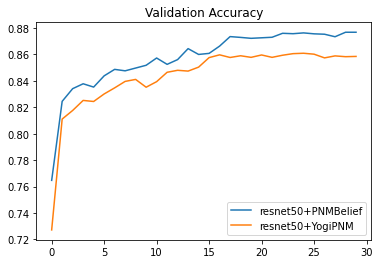

In [ ]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy');

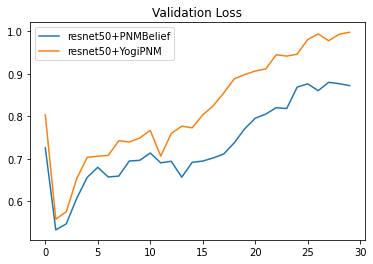

In [ ]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss');

In [ ]:
data = np.zeros((10,10), dtype=int)
D = pd.DataFrame(data)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
test_preds = model.forward(X_test)

In [ ]:
for x, y in zip(test_preds.argmax(dim=1).tolist(), y_test.tolist()):
    D[y][x] += 1

In [ ]:
D # resnet18+PNMBelief

,0,1,2,3,4,5,6,7,8,9
0,879,12,42,15,14,12,8,11,34,19
1,12,906,5,8,2,1,4,2,16,43
2,24,6,793,55,35,39,27,11,7,4
3,14,3,23,635,35,103,19,21,8,6
4,9,0,47,53,838,30,34,28,1,2
5,1,2,28,151,20,753,12,29,2,2
6,3,5,33,39,12,15,888,3,3,3
7,14,3,20,26,30,34,3,882,1,7
8,29,10,5,9,11,4,3,4,917,13
9,15,53,4,9,3,9,2,9,11,901


In [ ]:
D # resnet18

,0,1,2,3,4,5,6,7,8,9
0,878,16,36,22,4,8,8,5,33,15
1,10,905,1,6,1,2,3,3,11,45
2,20,0,817,43,37,32,27,16,11,8
3,9,5,32,693,45,138,49,32,7,8
4,9,1,40,44,822,27,28,18,1,3
5,9,5,33,124,32,746,11,48,3,1
6,4,4,22,27,21,10,867,4,3,3
7,7,1,14,26,30,30,2,861,1,6
8,36,18,3,7,6,3,3,4,916,28
9,18,45,2,8,2,4,2,9,14,883


In [ ]:
APreds = pd.DataFrame()

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
test_preds = []
model.eval()
with torch.no_grad():
            test_preds = model.forward(X_test)

In [ ]:
APreds['Adam'] = test_preds.argmax(dim=1).tolist()

In [ ]:
APreds['PNMBelief'] = test_preds.argmax(dim=1).tolist()

In [ ]:
APreds['Yogi'] = test_preds.argmax(dim=1).tolist()

In [ ]:
APreds['DiffGrad'] = test_preds.argmax(dim=1).tolist()

In [ ]:
APreds['YogiPNM'] = test_preds.argmax(dim=1).tolist()

In [ ]:
APreds['AdaBelief'] = test_preds.argmax(dim=1).tolist()

In [ ]:
APreds

,Adam,Yogi,PNMBelief,DiffGrad,YogiPNM,AdaBelief
0,71,68,68,68,68,68
1,97,80,33,80,84,33
2,55,55,55,55,55,55
3,51,51,51,51,51,51
4,60,71,71,71,71,71
...,...,...,...,...,...,...
9995,0,0,0,0,0,0
9996,21,14,14,14,14,14
9997,51,51,51,51,51,44
9998,42,42,42,42,42,42


In [ ]:
APreds = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ansambl_cifar100.csv')

In [ ]:
APreds.to_csv('/content/gdrive/MyDrive/Colab Notebooks/ansambl_cifar100.csv')

In [ ]:
APreds = APreds.drop(['Unnamed: 0'], axis=1)

In [ ]:
APreds

,Adam,Yogi,PNMBelief,DiffGrad,YogiPNM,AdaBelief
0,71,68,68,68,68,68
1,97,80,33,80,84,33
2,55,55,55,55,55,55
3,51,51,51,51,51,51
4,60,71,71,71,71,71
...,...,...,...,...,...,...
9995,0,0,0,0,0,0
9996,21,14,14,14,14,14
9997,51,51,51,51,51,44
9998,42,42,42,42,42,42


In [ ]:
data = np.zeros((10000,100), dtype=int)
ARes = pd.DataFrame(data)

In [ ]:
for i in range(10000):
    for j in range(6):
        if j == 0:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.6437
        if j == 1:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.6506
        if j == 2:
            ARes.iloc[i, APreds.iloc[i, j]%100] += 0.6592
        if j == 3:
            ARes.iloc[i, APreds.iloc[i, j]%100] += 0.6593
        if j == 4:
            ARes.iloc[i, APreds.iloc[i, j]%100] += 0.6459
        if j == 5:
            ARes.iloc[i, APreds.iloc[i, j]%100] += 0.6437

In [ ]:
anslist = ARes.idxmax(axis=1)

In [ ]:
accuracy = (torch.tensor(anslist).to(device) == y_test).float().mean().item()

In [ ]:
accuracy

0.7112999558448792